# Introducción al Caos

Exploremos la función no lineal.


In [1]:
# Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt

Llamamos a la función logistica no lineal de la siguiente manera

$$ x_{n+1} = ax_n(1-x_n) $$

Escribimos una función que nos permita obtener el valor de $x_{n+1}$.

In [2]:
def logistic(a, x):
    '''esta función usa ejecuta la 
    función de logística
    Input: x: condición inicial (seria x_n)
           a:parametro de control
    '''
    return a*x*(1-x)

donde $x_n$ es el valor actual, $x_n + 1$ es el siguiente valor y $a$ es un escalar que gobierna el comportamiento de el sistema. Una analogía/aplicación relativamente simple de la ecuación logística es el crecimiento / decaimiento de una población de animales. En este caso, $x_n$ sería la población actual, $x_n + 1$ son los próximos la población en proximos años, y es responsable de controlar la tasa de natalidad / muerte de los animales en un año determinado basado en la población actual. Lo primero que debe notar es que esta ecuación es increíblemente simple, sin embargo, bajo ciertas condiciones, codifica un comportamiento caótico infinitamente complejo, y el comportamiento del sistema se rige por la elección de $a$.



### Caso 1
Veamos qué sucede si usamos diferentes valores de $a$. Por ejemplo, elijamos un valor de $a \leq3$. Elijamos una suposición inicial de iteraciones ``x_0 = 0.1`` y ``n=1000``.

In [3]:
a = 0.52
x = 0.01
n = 1000
for i in range(n):
    x = logistic(a, x)
print('x_añofinal: ', x)

x_añofinal:  9.870295857360911e-287


¿Convergió al valor esperado?

In [4]:
# Elijamos un valor a <= 3
if a >= 3:
    print('Expected: ', (a-1)/a)
else:
    print('Expected: ', 0)

Expected:  0


### Caso 2
Si no fue así, puede acercarse a $(a-1)/a$ utilizando una estimación inicial más apropiada o aumentando el número de iteraciones.

Ahora, aumentemos el valor de $ a $ para que esté en el rango $ 3 < a \leq 1 + \sqrt{6} $. Esta vez, ejecute la función logística usando dos valores de ``n``, ``n=1000`` y ``n=1001``.


In [5]:
a = 3.2 # Elijamos un valor de a
x = 0.01
n = 1000
for i in range(n):# repite 1000 logistic
    x = logistic(a, x)
print('x_anio_final: ', x)

x_anio_final:  0.5130445095326298


In [6]:
a = 3.2# Elijamos el mismo valor de a previo 
x = 0.01
n = 1001# cambiemos el paso
for i in range(n):
    x = logistic(a, x)
print('x: ', x)

x:  0.7994554904673701


Ahora aumente el valor de ``n``. ¿Son diferentes los resultados? Repita este paso para cuatro valores grandes de ``n`` cuando
$ 1 + \sqrt{6} <a \leq 3.54 \ldots $
 

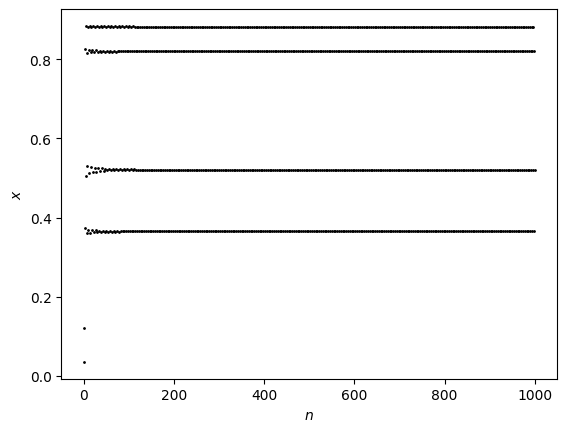

In [7]:
#ploteamos para una secuencia temporal n

plt.figure(0)
plt.xlabel('$n$')
plt.ylabel('$x$')
a = 3.539 #fijamos a
x = 0.01 #fijamos condición inicial
n = 1001

for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ok', markersize=1)

## Determinemos aquí las cuatro posibles soluciones

Aumentar aún más el valor de $ a $ hará que nuestros cálculos sean difíciles de visualizar uno por uno. Ejecute la siguiente celda para visualizar una gráfica de convergencia para $ \leq 3.54 \ldots <a \leq 3.57 \ldots $.

In [8]:
#ploteamos para otra secuencia temporal

plt.figure(0)
plt.xlabel('$n$')
plt.ylabel('$x$')
plt.ylim(0, 1)
a = 3.56
x = 0.01
n = 1001
for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ok', markersize=1)

¿Qué pasa si aumentamos el valor de $a$ a 3,58?

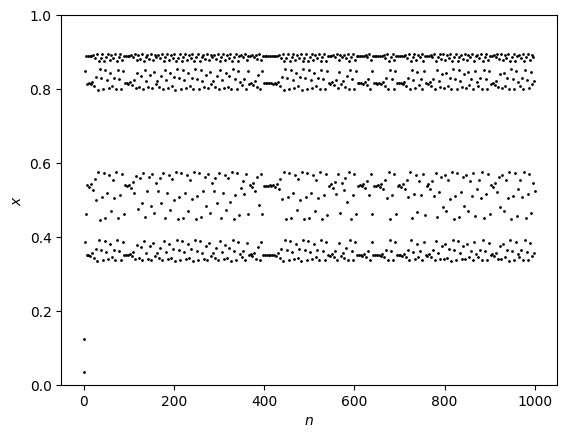

In [9]:
#ploteamos la función de logistica pero con valore saun mayores

plt.figure(1)
plt.xlabel('$n$')
plt.ylabel('$x$')
plt.ylim(0, 1)

a = 3.581 #fijamos a 
x = 0.01
n = 1001

for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ok', markersize=1)

Actualicemos el gráfico anterior usando un valor ligeramente diferente de $ a> 3.57 \ldots $.

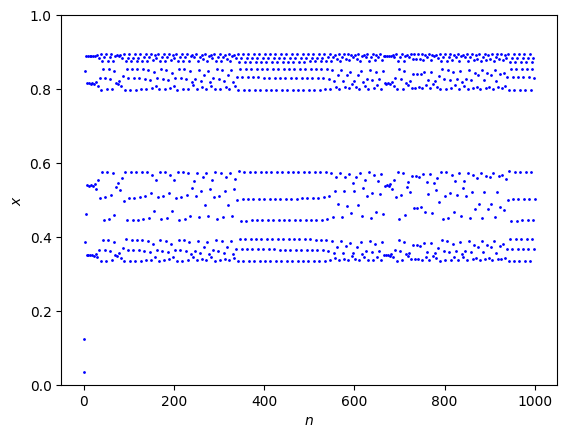

In [10]:
plt.figure(1)

a = 3.582 #Cambiemos ligeramente el valor de a
x = 0.01
n = 1001
plt.xlabel('$n$')
plt.ylabel('$x$')
plt.ylim(0, 1)
for i in range(n):
    x = logistic(a, x)
    plt.plot(i, x, 'ob', markersize=1)

¿Qué tan diferentes son los resultados?
Podemos visualizar todos los posibles valores convergentes de $x$ trazando un mapa logístico. Ejecutemos la siguiente celda para obtener la figura.

Text(0, 0.5, '$x$')

<Figure size 640x480 with 0 Axes>

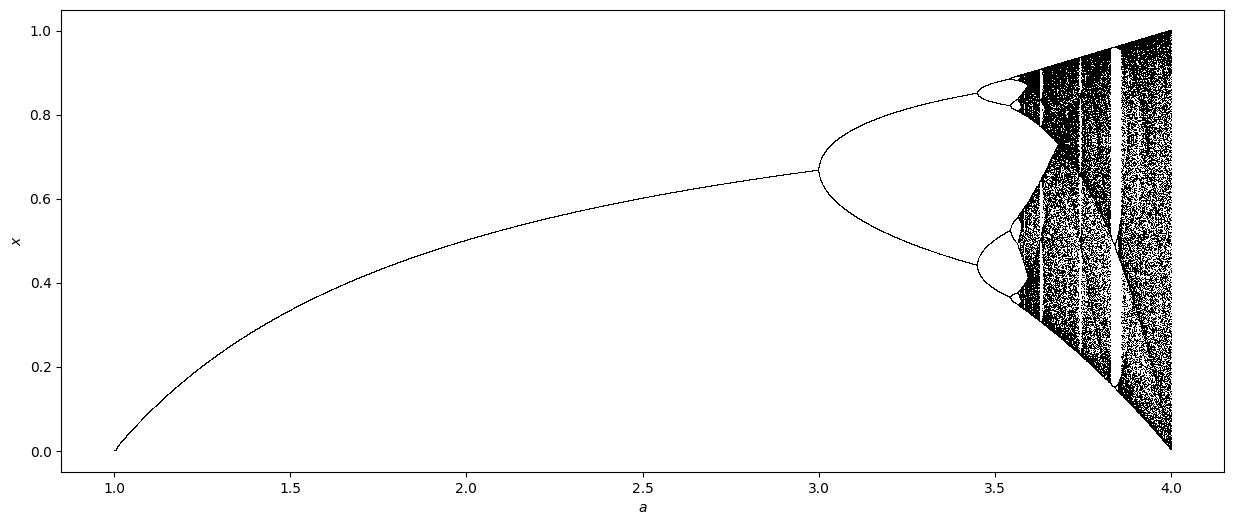

In [11]:
plt.figure(2)
plt.figure(figsize = (15,6))

# Definimos muchos valores de a simultáneamente
na = 10000
a = np.linspace(1, 4.0, na)

# Definamos una condición inicial para cada valor de a
x = 1e-5 * np.ones(na)

n = 1000 #numero de años
# Ejecutemos y grafiquemos x para valores grandes de n (soluciones convergentes)
for i in range(n):
    x = logistic(a, x)
    if i > 950:
        plt.plot(a, x, ',k')

plt.xlabel('$a$')
plt.ylabel('$x$')

## Atractor de Lorentz
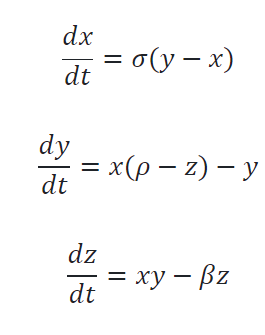

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# Estado inicial
x, y, z = 0, 1, 10 

# Parámetros fisicos
rho, sigma, beta = 28, 10, 8/3 

# Configuración del tiempo
t0 = 0     # Tiempo inicial
tf = 100   # Tiempo final
dt = 0.008 # Paso de tiempo
t = np.arange(t0, tf + dt, dt) # Evolución temporal
n = len(t)

# Definición del sistema de EDOs de Lorenz
def EDOs(t, r):
    x, y, z = r
    return np.array([sigma * (y - x),        # dx/dt
                     rho * x - y - x * z,  # dy/dt
                     x * y - beta * z])    # dz/dt

# Definición del método de Runge-Kutta de 4ª orden
def RK4(t, r, f, dt):
    k1 = dt * f(t, r)
    k2 = dt * f(t + dt / 2, r + k1 / 2)Atrator de Lorenz
Zoom to rectangle x/y fixes axis

    k3 = dt * f(t + dt / 2, r + k2 / 2)
    k4 = dt * f(t + dt, r + k3)
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Vector estado inicial
r = [x, y, z]

# Evolución de las EDOs
evol = np.zeros((n, 3))
evol[0, 0], evol[0, 1], evol[0, 2] = r[0], r[1], r[2]

# Integración numérica
for i in range(n - 1):
    evol[i + 1] = RK4(t[i], evol[i], EDOs, dt)

# Configuración de la figura
fig = plt.figure('Atrator de Lorenz', facecolor='k', figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set(facecolor='k')
ax.set_axis_off()

# Función de actualización para la animación
def update(i):
    ax.clear()  # Limpiar el eje
    ax.set(facecolor='k')  # Color de fondo
    ax.set_axis_off()  # Desactivar los ejes
    ax.plot(evol[:i, 0], evol[:i, 1], evol[:i, 2], color='lime', lw=0.9)  # Trazo del atractor
    ax.view_init(-6, -56 + i / 2)  # Ajustar la vista

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=n, interval=2, repeat=False)
plt.show()

SyntaxError: invalid syntax (1236250222.py, line 31)